# Market Basket Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from itertools import combinations
from wordcloud import WordCloud

pd.options.display.max_rows = 1000

In [2]:
os.listdir("mba")

['Association_customer-recommendations.docx',
 'calculation.txt',
 'D1.csv',
 'Dataset.xlsx',
 'MBA_SYNOPSIS.docx',
 'test_file.txt']

In [3]:
data = pd.read_excel("mba/Dataset.xlsx", header=None)

In [4]:
data.shape

(7501, 20)

In [5]:
data

0                  1            2                 3   \
0            shrimp            almonds      avocado    vegetables mix   
1           burgers          meatballs         eggs               NaN   
2           chutney                NaN          NaN               NaN   
3            turkey            avocado          NaN               NaN   
4     mineral water               milk   energy bar  whole wheat rice   
...             ...                ...          ...               ...   
7496         butter         light mayo  fresh bread               NaN   
7497        burgers  frozen vegetables         eggs      french fries   
7498        chicken                NaN          NaN               NaN   
7499       escalope          green tea          NaN               NaN   
7500           eggs    frozen smoothie  yogurt cake    low fat yogurt   

                4                 5     6               7             8   \
0     green grapes  whole weat flour  yams  cottage cheese  energy drink   
1              NaN               NaN   NaN             NaN           NaN   
2              NaN               NaN   NaN             NaN           NaN   
3              NaN               NaN   NaN             NaN           NaN   
4        green tea               NaN   NaN             NaN           NaN   
...            ...               ...   ...             ...           ...   
7496           NaN               NaN   NaN             NaN           NaN   
7497     magazines         green tea   NaN             NaN           NaN   
7498           NaN               NaN   NaN             NaN           NaN   
7499           NaN               NaN   NaN             NaN           NaN   
7500           NaN               NaN   NaN             NaN           NaN   

                9               10         11     12     13             14  \
0     tomato juice  low fat yogurt  green tea  honey  salad  mineral water   
1              NaN             NaN        NaN    NaN    NaN            NaN   
2              NaN             NaN        NaN    NaN    NaN            NaN   
3              NaN             NaN        NaN    NaN    NaN            NaN   
4              NaN             NaN        NaN    NaN    NaN            NaN   
...            ...             ...        ...    ...    ...            ...   
7496           NaN             NaN        NaN    NaN    NaN            NaN   
7497           NaN             NaN        NaN    NaN    NaN            NaN   
7498           NaN             NaN        NaN    NaN    NaN            NaN   
7499           NaN             NaN        NaN    NaN    NaN            NaN   
7500           NaN             NaN        NaN    NaN    NaN            NaN   

          15                 16               17       18         19  
0     salmon  antioxydant juice  frozen smoothie  spinach  olive oil  
1        NaN                NaN              NaN      NaN        NaN  
2        NaN                NaN              NaN      NaN        NaN  
3        NaN                NaN              NaN      NaN        NaN  
4        NaN                NaN              NaN      NaN        NaN  
...      ...                ...              ...      ...        ...  
7496     NaN                NaN              NaN      NaN        NaN  
7497     NaN                NaN              NaN      NaN        NaN  
7498     NaN                NaN              NaN      NaN        NaN  
7499     NaN                NaN              NaN      NaN        NaN  
7500     NaN                NaN              NaN      NaN        NaN  

[7501 rows x 20 columns]

In [78]:
#df.iloc[7497] #check the specific row data

light mayo              0
cooking oil             0
soup                    0
green grapes            0
green tea               1
whole wheat pasta       0
low fat yogurt          0
chocolate               0
ketchup                 0
cider                   0
strawberries            0
parmesan cheese         0
black tea               0
mayonnaise              0
vegetables mix          0
shampoo                 0
pepper                  0
carrots                 0
milk                    0
green beans             0
pancakes                0
avocado                 0
clothes accessories     0
ground beef             0
herb & pepper           0
turkey                  0
magazines               1
bacon                   0
almonds                 0
pickles                 0
whole wheat rice        0
grated cheese           0
muffins                 0
dessert wine            0
honey                   0
oatmeal                 0
candy bars              0
pet food                0
melons      

In [7]:
all_items = []
for col in data.columns:
    all_items.extend(data[col].dropna().values)

In [8]:
all_items_text = " ".join([x.replace(" ", "_") for x in all_items])
word_cloud = WordCloud(width = 800, height = 800, collocations = False,
                       background_color = 'white').generate(all_items_text)

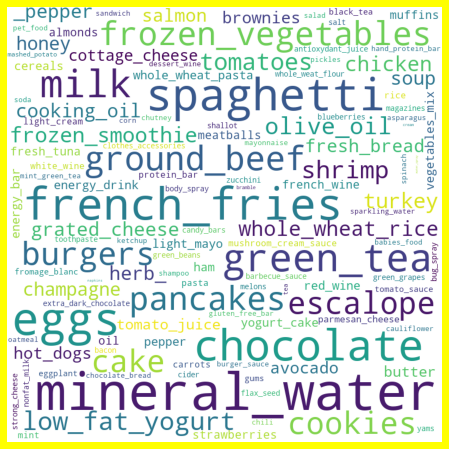

In [9]:
plt.figure(figsize = (8, 8), facecolor = "Yellow")
plt.imshow(word_cloud)
plt.axis("off")
 
plt.show()

In [10]:
dfz=pd.DataFrame()
dfz['all_items']=all_items
dfz['all_items'].value_counts()

mineral water           1788
eggs                    1348
spaghetti               1306
french fries            1282
chocolate               1230
green tea                991
milk                     972
ground beef              737
frozen vegetables        715
pancakes                 713
burgers                  654
cake                     608
cookies                  603
escalope                 595
low fat yogurt           574
shrimp                   536
tomatoes                 513
olive oil                494
frozen smoothie          475
turkey                   469
chicken                  450
whole wheat rice         439
grated cheese            393
cooking oil              383
soup                     379
herb & pepper            371
honey                    356
champagne                351
fresh bread              323
salmon                   319
brownies                 253
avocado                  250
hot dogs                 243
cottage cheese           239
tomato juice  

In [11]:
len(set(all_items))

119

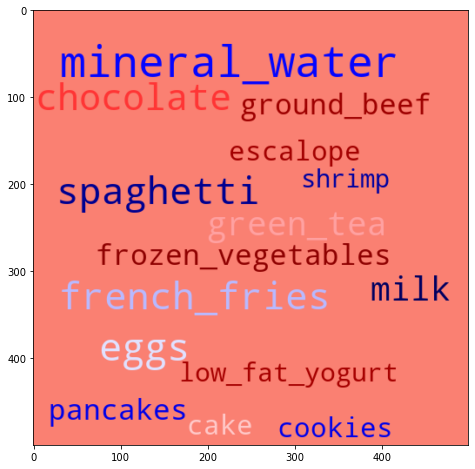

In [12]:
#change font_size, max_word and background_color
wordcloud = WordCloud(width=500, height=500, max_font_size=50, max_words=15, background_color="salmon",
                      colormap='seismic',random_state=1).generate(all_items_text)
plt.figure(figsize = (8, 8))
#Display the image
plt.imshow(wordcloud, interpolation="bilinear")
#plt.figure(figsize = (1, 1), facecolor = None)
#plt.figure(figsize=(400, 300))
#plt.figure()
#plt.margins(x=45, y=10)
#plt.axis("off")
plt.show()


(-0.5, 399.5, 199.5, -0.5)

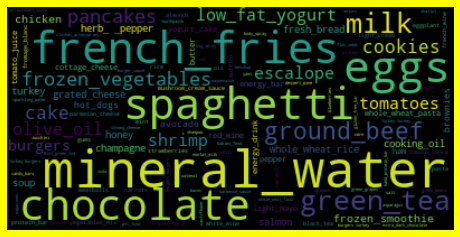

In [13]:
# Create and Generate a Word Cloud Image
wordcloud = WordCloud().generate(all_items_text)
#Display the generated image
plt.figure(figsize = (8, 8), facecolor = "Yellow")
plt.imshow(wordcloud, interpolation="bilinear")
#plt.figure(figsize=[2,1])
#plt.figure(figsize = (80, 80))
plt.axis("off")

## Data Preprocessing

In [14]:
orignial_count = [data.iloc[x, :].dropna().shape[0] for x in range(data.shape[0])]
unique_count = [data.iloc[x, :].dropna().unique().shape[0] for x in range(data.shape[0])]

In [15]:
orignial_count1 = pd.Series(orignial_count)
unique_count1 = pd.Series(unique_count)

In [16]:
duplicates = orignial_count1.compare(unique_count1)
duplicates.columns =['Original', 'Processed']
duplicates

Original  Processed
4394       8.0        7.0
4494       6.0        5.0
4526       6.0        5.0
6903       8.0        7.0
7109       8.0        7.0

##### We can see that transaction number 4394, 4494, 4526, 6903 and 7109 are having duplicate items in the transaction, lets print on of these transactions to verify the same

In [17]:
data.iloc[4394, :].dropna()

0             burgers
1                 ham
2                eggs
3    whole wheat rice
4                 ham
5        french fries
6             cookies
7           green tea
Name: 4394, dtype: object

##### There are duplicate items in the transactions, lets remove these in order to avoid further problems and create frequent itemsets

##### ham is repeating twice

#### Let us remove these duplicate items from the transactions.

In [18]:
for val in duplicates.index.values:
    data.iloc[val, :] = pd.Series(data.iloc[val, :].unique()).reindex(range(20))

In [19]:
data.iloc[4394, :].dropna()

0             burgers
1                 ham
2                eggs
3    whole wheat rice
4        french fries
5             cookies
6           green tea
Name: 4394, dtype: object

#### Now we have successfully eliminated the duplicates
#<b>Note:</b> I think its also a good idea to remove the transactions having just 1 item, but our dataset is smaller so its okay to leave them as is for now.

#### Generating One-hot encoding dataset from the items data

- Get unique items
- Create a dictionary with item and the index number
- Above details will help us to generate one-hot-encoding 

In [20]:
all_items = set(all_items)

In [21]:
item_dict = dict(zip(all_items, range(119)))

In [22]:
one_hot_en = []
for i, r in data.iterrows():
    row = [0]*119
    for x in r:
        if x is not np.nan:
            row[item_dict[x]] = 1
    one_hot_en.append(row)

In [23]:
df = pd.DataFrame(one_hot_en, columns=all_items)

In [24]:
df.head()

light mayo  cooking oil  soup  green grapes  green tea  whole wheat pasta  \
0           0            0     0             1          1                  0   
1           0            0     0             0          0                  0   
2           0            0     0             0          0                  0   
3           0            0     0             0          0                  0   
4           0            0     0             0          1                  0   

   low fat yogurt  chocolate  ketchup  cider  ...  spaghetti  chicken  \
0               1          0        0      0  ...          0        0   
1               0          0        0      0  ...          0        0   
2               0          0        0      0  ...          0        0   
3               0          0        0      0  ...          0        0   
4               0          0        0      0  ...          0        0   

   white wine  bramble  cottage cheese  tomatoes  cauliflower  chili  \
0           0        0               1         0            0      0   
1           0        0               0         0            0      0   
2           0        0               0         0            0      0   
3           0        0               0         0            0      0   
4           0        0               0         0            0      0   

   babies food  napkins  
0            0        0  
1            0        0  
2            0        0  
3            0        0  
4            0        0  

[5 rows x 119 columns]

##### Initial assumptions for the support and confidence threshold, will observe the results and update these parameters accordingly, if required(changing)

In [25]:
N = df.shape[0]
min_support = 1  ### 1%
min_confidence = 35  ### 35%

###### Formula for calculating support

![support](support.png)

###### Formula for calculating confidence

![confidence](confidence.png)

### Generate frequent 1-itemsets. 

In [26]:
c1 = df.sum()
l1 = (c1/ N) * 100
l1 = l1[l1 >= min_support]

In [27]:
l1.shape

(75,)

#### So number of frequent 1-itemsets are 75

##### Based on our transactional data, we found that 75 items are being purchased frequently, which qualify our support threshold

### Generate 2-itemsets

In [28]:
k2_items = list(combinations(list(l1.index), 2))

In [29]:
len(k2_items)

2775

In [30]:
counts = []
for item in k2_items:
    counts.append((df[item[0]]*df[item[1]]).sum())

In [31]:
c2 = pd.DataFrame()
c2['itemset'] = k2_items
c2['counts'] = counts
c2['support'] = (c2.counts/N) * 100


##### Let us now calculate the confidence, below is the approach I am using to calculate the confidence

- Consider we have items set {I1, I2}
- Calculate confidence as c1 = {I1, I2} / I1
- Calculate confidence as c2 = {I2, I1} / I2
- Get the maximum of (c1, c2), and that's our confidence score

This is just a manual approach, further will use some library to calculate all these stuff and compare the results

In [32]:
c2['confidence (x -> y)'] = [((r['counts'] / c1[r['itemset'][0]]) * 100) for i, r in c2.iterrows()]
c2['confidence (y -> x)'] = [((r['counts'] / c1[r['itemset'][1]]) * 100) for i, r in c2.iterrows()]
c2['max_confidence'] = c2[['confidence (x -> y)', 'confidence (y -> x)']].max(axis=1)

In [33]:
a2=c2[(c2['support'] >= min_support) & (c2['max_confidence'] >= min_confidence)]
a2

itemset  counts   support  \
117         (cooking oil, mineral water)     151  2.013065   
189                (soup, mineral water)     173  2.306359   
975                (milk, mineral water)     360  4.799360   
1034           (pancakes, mineral water)     253  3.372884   
1149        (ground beef, mineral water)     307  4.092788   
1174            (ground beef, spaghetti)     294  3.919477   
1925            (cereals, mineral water)      77  1.026530   
2079           (red wine, mineral water)      82  1.093188   
2104               (red wine, spaghetti)      77  1.026530   
2342  (mineral water, frozen vegetables)     268  3.572857   
2352             (mineral water, salmon)     128  1.706439   
2358          (mineral water, olive oil)     207  2.759632   
2365            (mineral water, chicken)     171  2.279696   
2368           (mineral water, tomatoes)     183  2.439675   

      confidence (x -> y)  confidence (y -> x)  max_confidence  
117             39.425587             8.445190       39.425587  
189             45.646438             9.675615       45.646438  
975             37.037037            20.134228       37.037037  
1034            35.483871            14.149888       35.483871  
1149            41.655360            17.170022       41.655360  
1174            39.891452            22.511485       39.891452  
1925            39.896373             4.306488       39.896373  
2079            38.862559             4.586130       38.862559  
2104            36.492891             5.895865       36.492891  
2342            14.988814            37.482517       37.482517  
2352             7.158837            40.125392       40.125392  
2358            11.577181            41.902834       41.902834  
2365             9.563758            38.000000       38.000000  
2368            10.234899            35.672515       35.672515

In [34]:
a2.shape

(14, 6)

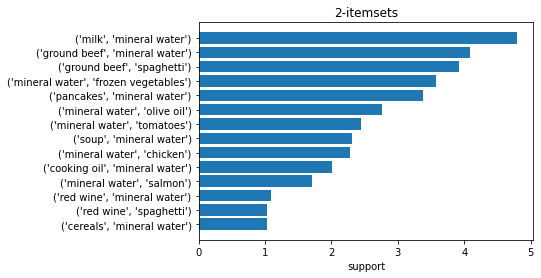

In [35]:
plt_data = a2[a2['support'] >= 1].sort_values('support')
plt_data['itemset'] = plt_data['itemset'].apply(str)
plt.barh(plt_data.itemset, plt_data.support)
plt.title("2-itemsets")
plt.xlabel('support')
#plt.ylabel('itemset')
plt.show()

#### we found 14 strong frequent 2-itemsets

Rules that satisfy both minimum-support threshold and minimun-confidence threshold are call <b>Strong</b>

In [36]:
l2 = c2[c2['support'] >= min_support]
l2_unique_items = list((set([x[0] for x in l2['itemset']] + [x[1] for x in l2['itemset']])))

In [37]:
l2.shape

(165, 6)

In [38]:
len(l2)


165

###### Number of frequent 2-itemsets are 165
### Now generate 3-itemsets

In [39]:
k3_items = list(combinations(list(l2_unique_items), 3))
print(len(k3_items))

5456


In [40]:
counts3 = []
for item in k3_items:
    counts3.append((df[item[0]]*df[item[1]]*df[item[2]]).sum())

In [41]:
c3 = pd.DataFrame()
c3['itemset'] = k3_items
c3['counts'] = counts3
c3['support'] = (c3.counts/N) * 100

In [42]:
def find_itemset(itemset):
    for i, r in l2.iterrows():
        if len(set(itemset) - set(r['itemset'])) == 0:
            return r['counts']
        else:
            return 0
        break
len(counts)

2775

##### Same approach is being used for confidence calculation for 3-itemset

In [43]:
xyz_conf = []
yzx_conf = []
zxy_conf = []
for i, r in c3.iterrows():
    if find_itemset(r['itemset'][0:2]) == 0:
        xyz_conf.append(0)
    else:
        xyz_conf.append((r['counts']/find_itemset(r['itemset'][0:2]))*100)
    
    if find_itemset(r['itemset'][1:]) == 0:
        yzx_conf.append(0)
    else:
        yzx_conf.append((r['counts']/find_itemset(r['itemset'][1:]))*100)
        
    if find_itemset(r['itemset'][::2]) == 0:
        zxy_conf.append(0)
    else:
        zxy_conf.append((r['counts']/find_itemset(r['itemset'][::2]))*100)

In [44]:
c3['confidence xy->z'] = xyz_conf
c3['confidence yz->x'] = yzx_conf
c3['confidence zx->y'] = zxy_conf

In [45]:
c3['max_confidence'] = c3[['confidence xy->z','confidence yz->x','confidence zx->y']].max(axis=1)

In [46]:
c3[c3['support'] >= 1].shape

(17, 7)

In [47]:
#c3[c3['support'] >= 1]
#c3[c3['max_confidence']>0]

In [48]:
#c3[c3['max_confidence']>0]
#c3.head()

###### Number of frequent 3-itemsets are 17

In [49]:
#x=c3[c3['support'] >= 1]
#c3

Text(0.5, 0, 'support')

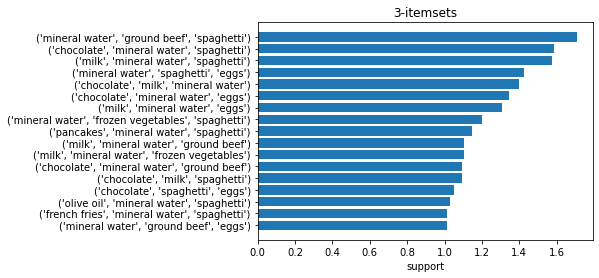

In [50]:
plt_data = c3[c3['support'] >= 1].sort_values('support')
plt_data['itemset'] = plt_data['itemset'].apply(str)
plt.barh(plt_data.itemset, plt_data.support)
plt.title("3-itemsets")
plt.xlabel('support')
#plt.ylabel('itemset')

##### Now we have calculated frequent itemsets by manually, now we will try MLXtend library  and compare both the results
### Let us use MLXtend library to generate and evaluate rules

In [51]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth, association_rules

In [52]:
# filling null values with string "ZERO"
dataset = data.fillna("ZERO")

In [53]:
# using TransactionEncoder to encode items data to True/False
encoding = TransactionEncoder()
encoding.fit(dataset.values)
encoded_data = encoding.transform(dataset.values)

In [54]:
# converting transformed values to pandas DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoding.columns_)

In [55]:
# removing the ZERO column
encoded_df.drop('ZERO', axis=1, inplace=True)

In [56]:
frequent_itemsets = apriori(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [57]:
frequent_itemsets.groupby("length").count()

support  itemsets
length                   
1            75        75
2           165       165
3            17        17

##### Above table describes the frequent itemsets 1, 2, 3

### Now we will use FP Growth algorithm with same parameters and compare the results

In [58]:
frequent_itemsets = fpgrowth(encoded_df, min_support=0.01, use_colnames=True, max_len=4)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

In [59]:
frequent_itemsets.groupby("length").count()

support  itemsets
length                   
1            75        75
2           165       165
3            17        17

###### FP Growth algorithm gives same results as Apriori. But main advantage of FP growth is, its faster and memory efficient

In [60]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [61]:
rules.shape

(406, 9)

In [62]:
rules.head()

antecedents     consequents  antecedent support  consequent support  \
0     (green tea)     (spaghetti)            0.132116            0.174110   
1     (spaghetti)     (green tea)            0.174110            0.132116   
2  (french fries)     (green tea)            0.170911            0.132116   
3     (green tea)  (french fries)            0.132116            0.170911   
4     (chocolate)     (green tea)            0.163845            0.132116   

    support  confidence      lift  leverage  conviction  
0  0.026530    0.200807  1.153335  0.003527    1.033405  
1  0.026530    0.152374  1.153335  0.003527    1.023900  
2  0.028530    0.166927  1.263488  0.005950    1.041786  
3  0.028530    0.215943  1.263488  0.005950    1.057436  
4  0.023464    0.143206  1.083943  0.001817    1.012944

In [63]:
len(rules)

406

######  we have 406 rules in total itemsets whicch qualify lift

###### We need to filter-out the relevent rules based on our min_support and min_confidence

In [64]:
rules[ (rules['confidence'] > 0.35) &
       (rules['support'] > 0.01) ].reset_index()
rules

antecedents                         consequents  \
0                           (green tea)                         (spaghetti)   
1                           (spaghetti)                         (green tea)   
2                        (french fries)                         (green tea)   
3                           (green tea)                      (french fries)   
4                           (chocolate)                         (green tea)   
5                           (green tea)                         (chocolate)   
6                                (eggs)                         (green tea)   
7                           (green tea)                              (eggs)   
8                      (low fat yogurt)                     (mineral water)   
9                       (mineral water)                    (low fat yogurt)   
10                     (low fat yogurt)                         (chocolate)   
11                          (chocolate)                    (low fat yogurt)   
12                     (low fat yogurt)                      (french fries)   
13                       (french fries)                    (low fat yogurt)   
14                     (low fat yogurt)                              (eggs)   
15                               (eggs)                    (low fat yogurt)   
16                     (low fat yogurt)                         (spaghetti)   
17                          (spaghetti)                    (low fat yogurt)   
18                     (low fat yogurt)                              (milk)   
19                               (milk)                    (low fat yogurt)   
20                  (frozen vegetables)                    (low fat yogurt)   
21                     (low fat yogurt)                 (frozen vegetables)   
22                      (mineral water)                            (shrimp)   
23                             (shrimp)                     (mineral water)   
24                             (shrimp)                         (green tea)   
25                          (green tea)                            (shrimp)   
26                             (shrimp)                         (chocolate)   
27                          (chocolate)                            (shrimp)   
28                               (eggs)                            (shrimp)   
29                             (shrimp)                              (eggs)   
30                             (shrimp)                         (spaghetti)   
31                          (spaghetti)                            (shrimp)   
32                               (milk)                            (shrimp)   
33                             (shrimp)                              (milk)   
34                  (frozen vegetables)                            (shrimp)   
35                             (shrimp)                 (frozen vegetables)   
36                           (pancakes)                            (shrimp)   
37                             (shrimp)                          (pancakes)   
38                             (shrimp)                       (ground beef)   
39                        (ground beef)                            (shrimp)   
40                          (olive oil)                     (mineral water)   
41                      (mineral water)                         (olive oil)   
42                          (olive oil)                         (spaghetti)   
43                          (spaghetti)                         (olive oil)   
44                          (olive oil)                              (milk)   
45                               (milk)                         (olive oil)   
46                          (olive oil)                         (chocolate)   
47                          (chocolate)                         (olive oil)   
48                          (olive oil)                       (ground beef)   
49                        (ground beef)                         (olive oil)   

In [65]:
len(rules)

406

###### Now lets calculate Support and Confidence for different values to see the variations in the results 
Minimum Support = 3%

In [66]:
frequent_itemsets3 = fpgrowth(encoded_df, min_support=0.03, use_colnames=True, max_len=4)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3.groupby("length").count()

support  itemsets
length                   
1            36        36
2            18        18

In [67]:
#We got very less itemsets, lets try by reducing the support value

###### Minimum Support = 2%

In [68]:
frequent_itemsets2 = fpgrowth(encoded_df, min_support=0.02, use_colnames=True, max_len=4)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2.groupby("length").count()

support  itemsets
length                   
1            53        53
2            50        50

###### There are no 3-itemsets with Minimum support value = 2%

###### Generating association rules with updated support and confidence
min_spport = 3% and min_confidence = 40%

In [69]:
rules1 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)
print("Number of rules: ", rules1.shape)
rules1[ (rules1['confidence'] > 0.40) &
       (rules1['support'] > 0.03) ].reset_index()

Number of rules:  (32, 9)


index    antecedents      consequents  antecedent support  \
0     29  (ground beef)  (mineral water)            0.098254   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401

In [70]:
#3.07/7501 * 100 = 0.040927

###### There is only one rule that satifies our support and confidence threshold.

### Ground beef --> Mineral water

#### Let us try to generate rules by using reduced support threshold


In [71]:
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)
print("Number of rules: ", rules2.shape)


Number of rules:  (94, 9)


In [72]:
rules2

antecedents          consequents  antecedent support  \
0           (green tea)          (spaghetti)            0.132116   
1           (spaghetti)          (green tea)            0.174110   
2        (french fries)          (green tea)            0.170911   
3           (green tea)       (french fries)            0.132116   
4           (chocolate)          (green tea)            0.163845   
5           (green tea)          (chocolate)            0.132116   
6                (eggs)          (green tea)            0.179709   
7           (green tea)               (eggs)            0.132116   
8      (low fat yogurt)      (mineral water)            0.076523   
9       (mineral water)     (low fat yogurt)            0.238368   
10      (mineral water)             (shrimp)            0.238368   
11             (shrimp)      (mineral water)            0.071457   
12             (shrimp)          (spaghetti)            0.071457   
13          (spaghetti)             (shrimp)            0.174110   
14          (olive oil)      (mineral water)            0.065858   
15      (mineral water)          (olive oil)            0.238368   
16          (olive oil)          (spaghetti)            0.065858   
17          (spaghetti)          (olive oil)            0.174110   
18    (frozen smoothie)      (mineral water)            0.063325   
19      (mineral water)    (frozen smoothie)            0.238368   
20      (mineral water)               (eggs)            0.238368   
21               (eggs)      (mineral water)            0.179709   
22               (eggs)            (burgers)            0.179709   
23            (burgers)               (eggs)            0.087188   
24      (mineral water)            (burgers)            0.238368   
25            (burgers)      (mineral water)            0.087188   
26            (burgers)       (french fries)            0.087188   
27       (french fries)            (burgers)            0.170911   
28            (burgers)          (spaghetti)            0.087188   
29          (spaghetti)            (burgers)            0.174110   
30               (milk)      (mineral water)            0.129583   
31      (mineral water)               (milk)            0.238368   
32               (milk)       (french fries)            0.129583   
33       (french fries)               (milk)            0.170911   
34               (milk)          (spaghetti)            0.129583   
35          (spaghetti)               (milk)            0.174110   
36               (milk)          (chocolate)            0.129583   
37          (chocolate)               (milk)            0.163845   
38               (milk)               (eggs)            0.129583   
39               (eggs)               (milk)            0.179709   
40      (mineral water)   (whole wheat rice)            0.238368   
41   (whole wheat rice)      (mineral water)            0.058526   
42               (eggs)       (french fries)            0.179709   
43       (french fries)               (eggs)            0.170911   
44      (mineral water)               (soup)            0.238368   
45               (soup)      (mineral water)            0.050527   
46      (mineral water)          (spaghetti)            0.238368   
47          (spaghetti)      (mineral water)            0.174110   
48               (eggs)          (spaghetti)            0.179709   
49          (spaghetti)               (eggs)            0.174110   
50  (frozen vegetables)          (spaghetti)            0.095321   
51          (spaghetti)  (frozen vegetables)            0.174110   
52  (frozen vegetables)      (mineral water)            0.095321   
53      (mineral water)  (frozen vegetables)            0.238368   
54  (frozen vegetables)          (chocolate)            0.095321   
55          (chocolate)  (frozen vegetables)            0.163845   
56  (frozen vegetables)               (milk)            0.095321   
57               (milk)  (frozen vegetables)            0.129583   


###### min_spport = 2%    and   min_confidence = 40%

In [73]:
rules2[ (rules2['confidence'] > 0.40) & (rules2['support'] > 0.02) ].reset_index()

index    antecedents      consequents  antecedent support  \
0     14    (olive oil)  (mineral water)            0.065858   
1     45         (soup)  (mineral water)            0.050527   
2     85  (ground beef)  (mineral water)            0.098254   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.238368  0.027596    0.419028  1.757904  0.011898    1.310962  
1            0.238368  0.023064    0.456464  1.914955  0.011020    1.401255  
2            0.238368  0.040928    0.416554  1.747522  0.017507    1.305401

In [74]:
##**** TILL Here****##

In [75]:
#pip install requests

In [76]:
import requests

In [77]:
test_file = open("mba/test_file", "rb")#test_file

FileNotFoundError: [Errno 2] No such file or directory: 'mba/test_file'

In [ ]:
test_url = "http://httpbin.org/post"

In [ ]:
test_response = requests.post(test_url, files = {"form_field_name": test_file})

In [ ]:
if test_response.ok:
    print("Upload completed successfully!")
    print(test_response.text)
else:
    print("Something went wrong!")

In [ ]:
file = open('mba/D1.csv')
#os.listdir("mba")